import pandas as pd
import numpy as np
import sklearn.grid_search
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing 
from sklearn import linear_model

Part 1: 

In this part we use one of the data sets 'IAValues'. There are some missing values in the column 'rootznaws'. The gole is to build a model to predict this missing values. I have used KNN to build this model. Also, GridSearchCV is being used to find the optimal value of K in KNN model.

In [11]:
#load the data as a pandas data frame
raw_data = pd.read_csv('IAValues.txt')
raw_data.head()

,Unnamed: 0,Unnamed: 0.1,mukey,OBJECTID_1,tk0_5a,tk5_20a,tk20_50a,tk50_100a,tk100_150a,tk150_999a,...,nccpi2cs,nccpi2sg,nccpi2co,nccpi2all,pctearthmc,rootznemc,rootznaws,droughty,pwsl1pomu,musumcpct
0,0,0,1601875,55642,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,100,0,0.0,1,0,100
1,1,1,1601876,55643,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,100,0,0.0,1,0,100
2,2,2,1601877,55584,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,NaN,0,0,100
3,3,3,1601878,55622,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,NaN,0,999,100
4,4,4,1601879,55652,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0.0,0,0,100


In [12]:
#check if rootznaws is present among the columns
print 'rootznaws' in raw_data.columns

True


In [13]:
#check the portion of the data that rootznaws is not NaN to see if we have enough known values for rootznaws
#to be able to predict 
print float(len(raw_data[raw_data['rootznaws'].notnull()]))/len(raw_data['rootznaws'])

0.814831960004


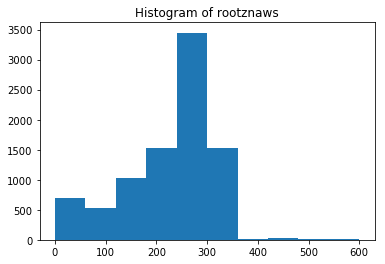

In [14]:
#plot rootznaws where it is not null
known_rootznaws = raw_data[raw_data.rootznaws.notnull()]['rootznaws']
plt.hist(known_rootznaws)
plt.title("Histogram of rootznaws")
plt.show()

In [15]:
#selet part of the data frame with non null values of rootznaws for train and test
data_no_null = raw_data[raw_data.rootznaws.notnull()]
x = data_no_null.ix[:, data_no_null.columns != 'rootznaws']
y = data_no_null.ix[:, data_no_null.columns == 'rootznaws']
#selet part of the data frame with null values of rootznaws for prediction
data_null = raw_data[raw_data.rootznaws.isnull()]
x_for_pred = data_null.ix[:, data_null.columns != 'rootznaws']

/opt/conda/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python2.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


In [16]:
#application of Grid search with KNN to find the best estimator
x_train, x_test, y_train, y_test = sklearn.cross_validation.train_test_split(x,y,test_size=0.2,random_state=42)
k = np.arange(20)+1
parameters = {'n_neighbors': k}
knn = sklearn.neighbors.KNeighborsRegressor()
clf = sklearn.grid_search.GridSearchCV(knn,parameters,cv=10)
clf.fit(x_train, y_train)
print('Best score is :', clf.best_score_)
print('Best params are :',clf.best_params_)

('Best score is :', 0.6537233206285251)
('Best params are :', {'n_neighbors': 3})


In [17]:
#values that is predicted for missing values of rootznaws by above estimator
clf.predict(x_for_pred)

array([[   0.        ],
       [   0.        ],
       [ 244.33333333],
       ..., 
       [ 211.        ],
       [ 258.        ],
       [ 197.66666667]])

Part 2:

In addition to the first data set that we used above, we are using another data set names 'muggatt'. It includes other features/parameters of the soil. Our hope is that by adding more features, we can build a more accuarte model to predict the missing values of 'rootznaws'. 

To build the model, I have used both KNN and Linear Regression. Regression gives us better results.
Also, note that the second data set has some categorical columns. I have used one label encoding for such columns before applying linear regression.

In [20]:
#read the second set of data
Q2_data = pd.read_csv('muaggatt.txt')

In [21]:
#join two data sets. This way we will have more features
df = pd.concat([raw_data, Q2_data], axis=1, join='inner')
len(df)

10801

In [22]:
print df.head()

   Unnamed: 0  Unnamed: 0.1    mukey  OBJECTID_1  tk0_5a  tk5_20a  tk20_50a  \
0           0             0  1601875       55642     0.0      0.0       0.0   
1           1             1  1601876       55643     0.0      0.0       0.0   
2           2             2  1601877       55584     0.0      0.0       0.0   
3           3             3  1601878       55622     0.0      0.0       0.0   
4           4             4  1601879       55652     0.0      0.0       0.0   

   tk50_100a  tk100_150a  tk150_999a   ...      engsldcp  englrsdcd  \
0        0.0         0.0         0.0   ...     Not rated  Not rated   
1        0.0         0.0         0.0   ...     Not rated  Not rated   
2        0.0         0.0         0.0   ...     Not rated  Not rated   
3        0.0         0.0         0.0   ...     Not rated  Not rated   
4        0.0         0.0         0.0   ...     Not rated  Not rated   

   engcmssdcd  engcmssmp  urbrecptdcd  urbrecptwta  forpehrtdcp  hydclprs  \
0   Not rated  Not ra

In [23]:
# select part of the data frame that rootznaws is not missing for train and test
df1 = df[df.rootznaws.notnull()]

#get the numerical columns
df1_numerical = df1.select_dtypes(exclude=['object'])

#get the categorical columns
df1_categorical = df1.select_dtypes(include=['object'])

#for categorical columns perform LabelEnocoding
df1_all = df1_numerical
lb_make = LabelEncoder()
for col in df1_categorical:
    df1_all[col] = lb_make.fit_transform(df1_categorical[col])

/opt/conda/lib/python2.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


90

In [16]:
# select part of the data frame that rootznaws is not missing for train and test
df1 = df[df.rootznaws.notnull()]

#get the numerical columns
df1_numerical = df1.select_dtypes(exclude=['object'])

#get the categorical columns
df1_categorical = df1.select_dtypes(include=['object'])

#for categorical columns perform LabelEnocoding
df1_all = df1_numerical
lb_make = LabelEncoder()
for col in df1_categorical:
    df1_all[col] = lb_make.fit_transform(df1_categorical[col])

#fill out the NaN values
df1_all.apply(lambda x: x.fillna(x.mean(), inplace=True),axis=1)
del df1_all['mustatus']
del df1_all['iccdcd'] 
del df1_all['niccdcd']


#select features columns and target
x2 = df1_all.ix[:, df1_all.columns != 'rootznaws']
y2 = df1_all.ix[:, df1_all.columns == 'rootznaws']


#use grid search CV with KNN to train and test
x_train2, x_test2, y_train2, y_test2 = sklearn.cross_validation.train_test_split(x2, y2, test_size=0.2,random_state=4)
k = np.arange(20) + 1
parameters = {'n_neighbors': k}
knn = sklearn.neighbors.KNeighborsRegressor()
clf = sklearn.grid_search.GridSearchCV(knn,parameters,cv=10)
clf.fit(x_train2, y_train2)
print('Best score is :', clf.best_score_)
print('Best params are :',clf.best_params_)


/opt/conda/lib/python2.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python2.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


('Best score is :', 0.6629016246533684)
('Best params are :', {'n_neighbors': 2})


In [17]:
#perform the same data manipulation on part of the data frame that is used for prediction
df2 = df[df.rootznaws.isnull()]
df2_numerical = df2.select_dtypes(exclude=['object'])
df2_categorical = df2.select_dtypes(include=['object'])
df2_all = df2_numerical
lb_make2 = LabelEncoder()
for col in df2_categorical:
    df2_all[col] = lb_make2.fit_transform(df2_categorical[col])

#fill out the NaN values
df2_all.apply(lambda x: x.fillna(x.mean(), inplace=True),axis=1)
#df2_all.isnull().any()
del df2_all['mustatus']
del df2_all['iccdcd'] 
del df2_all['niccdcd']

#use the best model for prediction
x_for_pred2 = df2_all.ix[:, df2_all.columns != 'rootznaws']
clf.predict(x_for_pred2)

/opt/conda/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python2.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


array([[   0.],
       [   0.],
       [ 174.],
       ..., 
       [ 208.],
       [ 273.],
       [ 190.]])

In [21]:
# select part of the data frame that rootznaws is not missing for train and test
df1 = df[df.rootznaws.notnull()]

#get the numerical columns
df1_numerical = df1.select_dtypes(exclude=['object'])

#get the categorical columns
df1_categorical = df1.select_dtypes(include=['object'])

#use get_dummies to onvert categorical variable into dummy variables and the join with other numerical columns
df1_all = pd.concat([df1_numerical, pd.get_dummies(df1_categorical)], axis=1)
df1_all.apply(lambda x: x.fillna(x.mean(), inplace=True),axis=1)
del df1_all['mustatus']
del df1_all['iccdcd'] 
del df1_all['niccdcd']

# x2 includes all the feature columns
x2 = df1_all.ix[:, df1_all.columns != 'rootznaws']
#y2 is the target column
y2 = df1_all.ix[:, df1_all.columns == 'rootznaws']

#divide into train and test
x_train2, x_test2, y_train2, y_test2 = sklearn.cross_validation.train_test_split(x2, y2, test_size=0.2)

#fit into a linear model
regr = linear_model.LinearRegression()
regr.fit(x_train2, y_train2)

# report the best score
print('Best score is :', regr.score(x_test2, y_test2))

/opt/conda/lib/python2.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


('Best score is :', 0.95689583734976114)
